In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
numberOfSamples = 7*10-7

with open("../data/input.dat", "r") as arq:
    A = np.loadtxt(arq, delimiter=",")

print(A)

[[ 6.  0. 46.]
 [ 5.  0. 54.]
 [ 4.  0. 56.]
 [ 2.  0. 78.]
 [ 0.  0. 73.]
 [ 6.  1. 61.]
 [ 5.  1. 65.]
 [ 4.  1. 79.]
 [ 3.  1. 66.]
 [ 2.  1. 79.]
 [ 1.  1. 69.]
 [ 0.  1. 71.]
 [ 6.  2. 71.]
 [ 4.  2. 88.]
 [ 3.  2. 74.]
 [ 2.  2. 73.]
 [ 1.  2. 60.]
 [ 0.  2. 49.]
 [ 6.  3. 78.]
 [ 5.  3. 86.]
 [ 4.  3. 82.]
 [ 3.  3. 75.]
 [ 2.  3. 70.]
 [ 0.  3. 56.]
 [ 6.  4. 88.]
 [ 5.  4. 69.]
 [ 4.  4. 73.]
 [ 3.  4. 69.]
 [ 2.  4. 63.]
 [ 1.  4. 49.]
 [ 0.  4. 53.]
 [ 6.  5. 86.]
 [ 5.  5. 57.]
 [ 4.  5. 67.]
 [ 3.  5. 63.]
 [ 2.  5. 61.]
 [ 1.  5. 53.]
 [ 0.  5. 59.]
 [ 6.  6. 67.]
 [ 5.  6. 71.]
 [ 3.  6. 56.]
 [ 2.  6. 55.]
 [ 1.  6. 61.]
 [ 0.  6. 65.]
 [ 6.  7. 48.]
 [ 5.  7. 44.]
 [ 4.  7. 57.]
 [ 2.  7. 64.]
 [ 1.  7. 43.]
 [ 0.  7. 74.]
 [ 5.  8. 62.]
 [ 4.  8. 72.]
 [ 3.  8. 75.]
 [ 2.  8. 74.]
 [ 1.  8. 70.]
 [ 0.  8. 59.]
 [ 6.  9. 64.]
 [ 5.  9. 75.]
 [ 4.  9. 87.]
 [ 3.  9. 91.]
 [ 2.  9. 85.]
 [ 1.  9. 79.]
 [ 0.  9. 77.]]


In [3]:
def plotMat(A):
    fig, ax = plt.subplots()
    ax.scatter(A[:,1], A[:,0])
    plt.show()

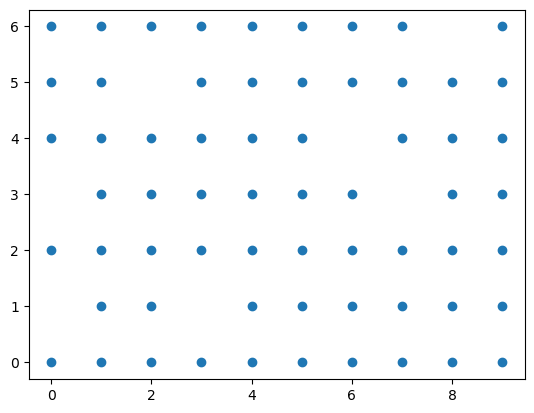

In [4]:
plotMat(A)

In [5]:
def parallelLines(x_pos, y_pos, x, h, theta):
    theta_aux = theta * np.pi /180
    upperBound = (x - x_pos + h/np.cos(theta_aux))*np.tan(theta_aux) + y_pos
    lowerBound = (x - x_pos - h/np.cos(theta_aux))*np.tan(theta_aux) + y_pos
    return lowerBound, upperBound

def test_parallelLines():
    x = 1
    h = 0.5
    theta = 45
    x_pos = 0
    y_pos = 0
    lowerBound, upperBound = parallelLines(x_pos, y_pos, x, h, theta)
    assert lowerBound < upperBound
    assert upperBound < 2
    assert lowerBound > 0
    
test_parallelLines()

In [19]:
def getSamplesInDirection(A, x_pos, y_pos, direction, tolerance=0.5):
    B = []
    for y, x, i in zip(A[:,0], A[:,1], range(A.shape[0])):
        lowerBound, upperBound = parallelLines(x_pos, y_pos, x, tolerance, direction)
        if y > lowerBound and y < upperBound and x > x_pos:
            B.append(list(A[i, :]))
            
    return np.array(B)
     
def test_getSamplesInDirection():
    B = getSamplesInDirection(A, 0, 0, 45)
    
    np.all(B[:,2] - np.array([69, 73, 75, 73, 57, 67]))

    print(B[:,2])
    
test_getSamplesInDirection()

[69. 73. 75. 73. 57. 67.]


In [17]:
def getSamplesInsideLag(A, x_pos, y_pos, lag, tolerance=0.5):
    upperBound = (lag + tolerance)**2
    lowerBound = (lag - tolerance)**2
    B = []
    for y, x, i in zip(A[:,0], A[:,1], range(A.shape[0])):
        value = (x-x_pos)**2 + (y-y_pos)**2
        if value <= upperBound and value >= lowerBound:
            B.append(list(A[i, :]))
            
    return np.array(B)

def test_getSamplesInsideLag():
    B = getSamplesInsideLag(A, 0, 0, np.sqrt(2), 0.5)
    
    np.all(B[:,2] - np.array([69, 71]))
    print(B[:,2])
    
test_getSamplesInsideLag()

[69. 71.]


In [50]:
def getPairOfPoints(A,direction, lag, maxLags=4):
    """
    Function to get the various pairs of points for each lag in a specific direction
    
    Arguments:
        - A: 2D numpy array
        - direction: a angle, multiple of 45 degrees
    """

    pairs = [[],
    for y_pos, x_pos, value in zip(A[:,0], A[:,1], A[:,2]):
        samplesInDirection = getSamplesInDirection(A, x_pos, y_pos, direction)
        if len(samplesInDirection) > 0:
            for lag_multiplier in range(maxLags):
                actual_lag = lag * lag_multiplier
                samplesInsideLag = getSamplesInsideLag(samplesInDirection, x_pos, y_pos, actual_lag)
                for point in samplesInsideLag:
                    tail = value
                    head = point[2]
                    pair = [tail, head, actual_lag]
                    pairs.append(pair)
                    
    return np.array(pairs)

pairs = getPairOfPoints(A,45,np.sqrt(2))

print(pairs)

[[54.         61.          1.41421356]
 [56.         65.          1.41421356]
 [56.         71.          2.82842712]
 [78.         66.          1.41421356]
 [78.         88.          2.82842712]
 [78.         86.          4.24264069]
 [73.         69.          1.41421356]
 [73.         73.          2.82842712]
 [73.         75.          4.24264069]
 [65.         71.          1.41421356]
 [79.         78.          2.82842712]
 [66.         88.          1.41421356]
 [66.         86.          2.82842712]
 [66.         88.          4.24264069]
 [79.         74.          1.41421356]
 [79.         82.          2.82842712]
 [79.         69.          4.24264069]
 [69.         73.          1.41421356]
 [69.         75.          2.82842712]
 [69.         73.          4.24264069]
 [71.         60.          1.41421356]
 [71.         70.          2.82842712]
 [71.         69.          4.24264069]
 [88.         86.          1.41421356]
 [88.         88.          2.82842712]
 [74.         82.        